## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [10.3, 8.3]

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot X vs. y

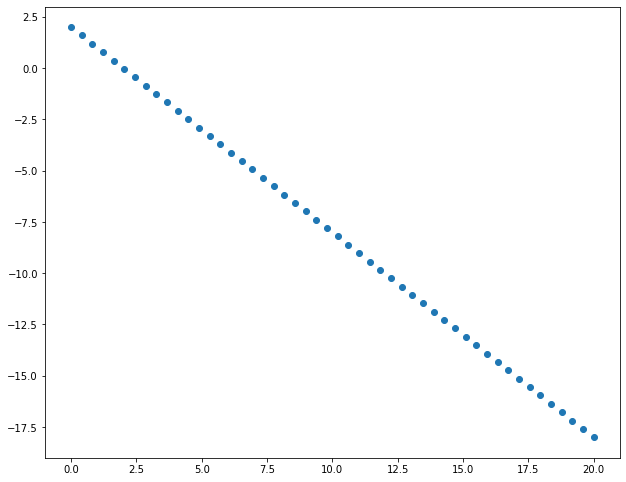

In [4]:
plt.scatter(X, y);

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

In [5]:
def adaGrad(features, target, lr, epsilon, max_iter):

  theta_0_upd, theta_1_upd, loss, preds = ([] for i in range(4))

  n_samp = len(features)

  theta_0, theta_1  = 0, 0
  psum_theta_0, psum_theta_1 = 0, 0

  for i in range(max_iter):

    if( i > 2 and abs(loss[-2]-loss[-1]) < 0.001):
      break

    print('\n')
    print('*'*18 + ' Iteration ' + str(i) + ' ' + '*'*20 )
    print('\n')

    theta_0_upd.append(theta_0)
    theta_1_upd.append(theta_1)

    h_x = theta_0 + (features * theta_1)

    preds.append(h_x)

    print('h(x):{}'.format(h_x))

    err = h_x - target
    cost = (err@err) / (2*n_samp)

    loss.append(cost)

    print('\nError Vector: \n{}\n\n j = {}\n'.format(err, cost))


    d_theta_0 = (err.sum()) / n_samp
    d_theta_1 = (err @ features) / n_samp


    psum_theta_0 = psum_theta_0 + (d_theta_0)**2
    psum_theta_1 = psum_theta_1 + (d_theta_1)**2

    grad_vec = np.asarray([d_theta_0, d_theta_1])

    print('\nGradient Vector :', grad_vec)

    grad_norm = np.linalg.norm(grad_vec)

    print('\nGradient Vector Norm:', grad_norm)

    if(grad_norm <= 0.001):
      break

    theta_0 = theta_0 - ((lr * d_theta_0) / (np.sqrt(psum_theta_0) + epsilon))
    theta_1 = theta_1 - ((lr * d_theta_1) / (np.sqrt(psum_theta_1) + epsilon))

    print('\ntheta_0_new : {}\ntheta_1_new : {}'.format(theta_0, theta_1))
  
  return theta_0_upd, theta_1_upd, loss, preds


##### The following results uses alpha = 0.05, epsilon =  1e-08, and max. iterations = 500.

In [6]:
theta_0_upd, theta_1_upd, loss, preds = adaGrad(X, y, 0.05, 1e-08, 500)

Streaming output truncated to the last 5000 lines.
Gradient Vector Norm: 13.663476244004721

theta_0_new : -0.6362750826220561
theta_1_new : -0.7041975889054143


****************** Iteration 128 ********************


h(x):[ -0.63627508  -0.92370267  -1.21113026  -1.49855784  -1.78598543
  -2.07341302  -2.36084061  -2.64826819  -2.93569578  -3.22312337
  -3.51055096  -3.79797854  -4.08540613  -4.37283372  -4.6602613
  -4.94768889  -5.23511648  -5.52254407  -5.80997165  -6.09739924
  -6.38482683  -6.67225442  -6.959682    -7.24710959  -7.53453718
  -7.82196477  -8.10939235  -8.39681994  -8.68424753  -8.97167511
  -9.2591027   -9.54653029  -9.83395788 -10.12138546 -10.40881305
 -10.69624064 -10.98366823 -11.27109581 -11.5585234  -11.84595099
 -12.13337857 -12.42080616 -12.70823375 -12.99566134 -13.28308892
 -13.57051651 -13.8579441  -14.14537169 -14.43279927 -14.72022686]

Error Vector: 
[-2.63627508 -2.5155394  -2.39480373 -2.27406805 -2.15333237 -2.03259669
 -1.91186101 -1.79112534 -1

In [7]:
from sklearn.metrics import r2_score

y_pred = theta_0_upd[-1] +  (X * theta_1_upd[-1])
r2_score(y, y_pred)

0.9484638125790851

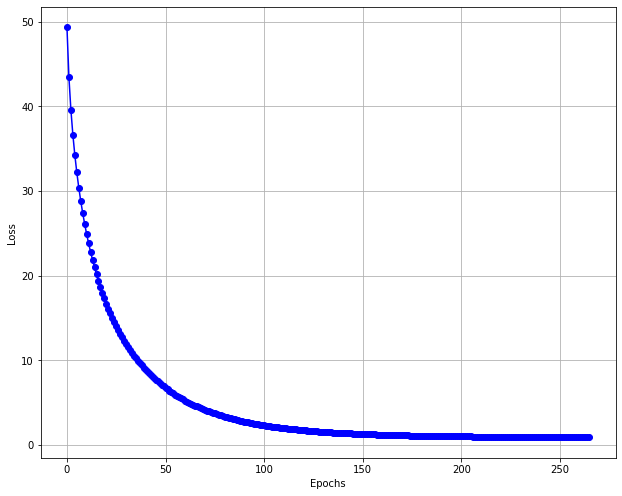

In [8]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss, marker = 'o', color='b');

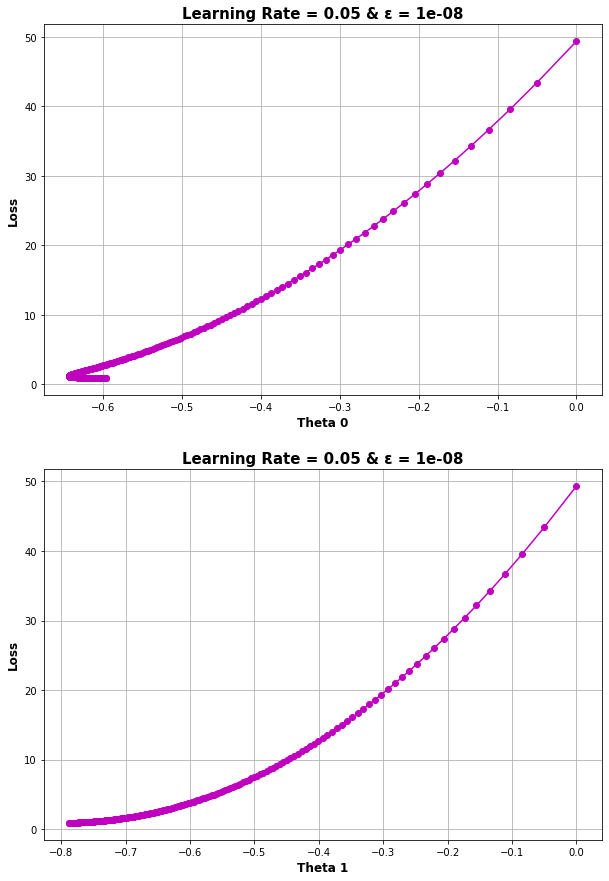

In [9]:
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))

ax1.set_title('Learning Rate = 0.05 & ε = 1e-08', fontweight='bold', fontsize=15)
ax1.set_xlabel('Theta 0', fontweight='bold', fontsize=12)
ax1.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax1.grid()


ax1.plot(theta_0_upd, loss, marker = 'o', color='m')

ax2.set_title('Learning Rate = 0.05 & ε = 1e-08', fontweight='bold', fontsize=15)
ax2.set_xlabel('Theta 1', fontweight='bold', fontsize=12)
ax2.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax2.grid()

ax2.plot(theta_1_upd, loss, marker = 'o', color='m');

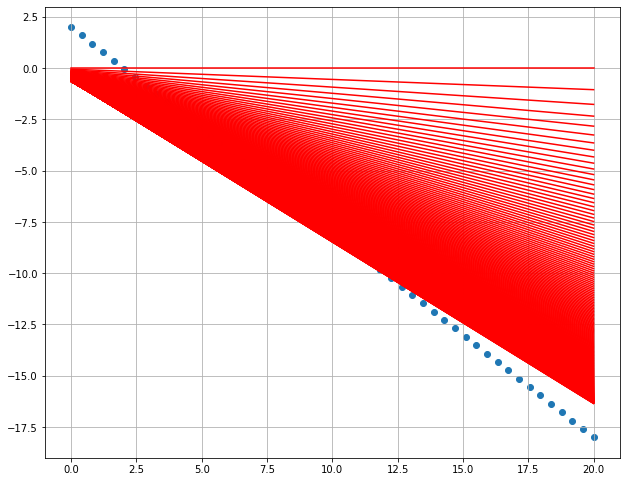

In [10]:
plt.scatter(X, y)
plt.grid()

for y_hat in preds:
  plt.plot(X, y_hat, color='r');

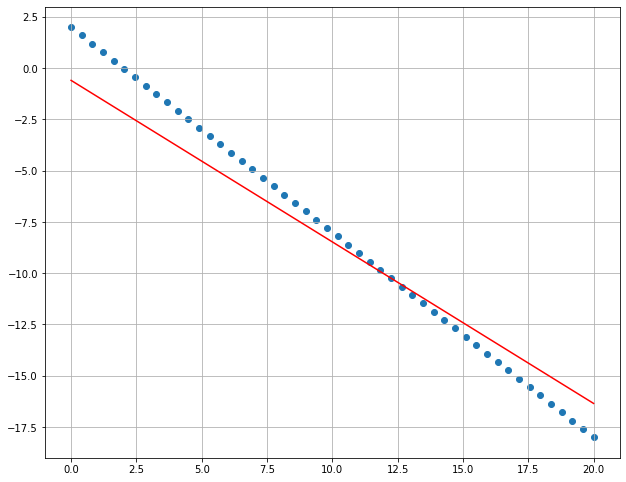

In [11]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='r');
plt.grid()

##### The following results uses alpha = 0.005, epsilon =  1e-08, and max. iterations = 5000.

In [12]:
theta_0_upd, theta_1_upd, loss, preds = adaGrad(X, y, 0.005, 1e-08, 5000)

Streaming output truncated to the last 5000 lines.
  -8.47926434  -8.70623041  -8.93319648  -9.16016255  -9.38712862
  -9.61409469  -9.84106076 -10.06802683 -10.2949929  -10.52195897
 -10.74892504 -10.97589112 -11.20285719 -11.42982326 -11.65678933]

Error Vector: 
[-2.53545188e+00 -2.35425469e+00 -2.17305749e+00 -1.99186030e+00
 -1.81066310e+00 -1.62946591e+00 -1.44826871e+00 -1.26707152e+00
 -1.08587432e+00 -9.04677129e-01 -7.23479934e-01 -5.42282739e-01
 -3.61085544e-01 -1.79888349e-01  1.30884620e-03  1.82506041e-01
  3.63703236e-01  5.44900431e-01  7.26097627e-01  9.07294822e-01
  1.08849202e+00  1.26968921e+00  1.45088641e+00  1.63208360e+00
  1.81328080e+00  1.99447799e+00  2.17567519e+00  2.35687238e+00
  2.53806958e+00  2.71926677e+00  2.90046397e+00  3.08166116e+00
  3.26285836e+00  3.44405555e+00  3.62525275e+00  3.80644994e+00
  3.98764714e+00  4.16884433e+00  4.35004153e+00  4.53123872e+00
  4.71243592e+00  4.89363311e+00  5.07483031e+00  5.25602750e+00
  5.43722470e+00  5

In [13]:
y_pred = theta_0_upd[-1] +  (X * theta_1_upd[-1])
r2_score(y, y_pred)

0.7095974929894115

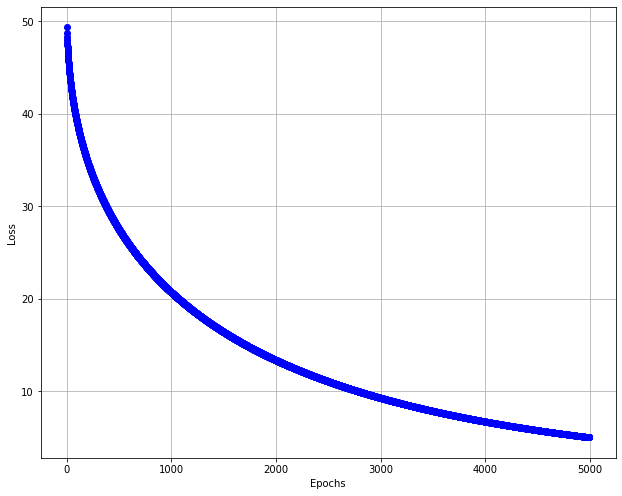

In [14]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss, marker = 'o', color='b');

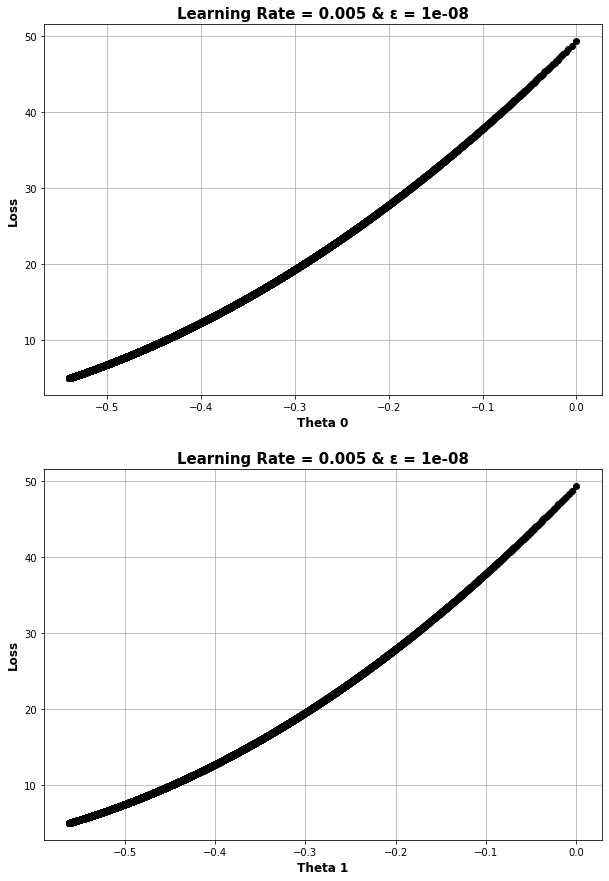

In [15]:
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))

ax1.set_title('Learning Rate = 0.005 & ε = 1e-08', fontweight='bold', fontsize=15)
ax1.set_xlabel('Theta 0', fontweight='bold', fontsize=12)
ax1.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax1.grid()


ax1.plot(theta_0_upd, loss, marker = 'o', color='black')

ax2.set_title('Learning Rate = 0.005 & ε = 1e-08', fontweight='bold', fontsize=15)
ax2.set_xlabel('Theta 1', fontweight='bold', fontsize=12)
ax2.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax2.grid()

ax2.plot(theta_1_upd, loss, marker = 'o', color='black');

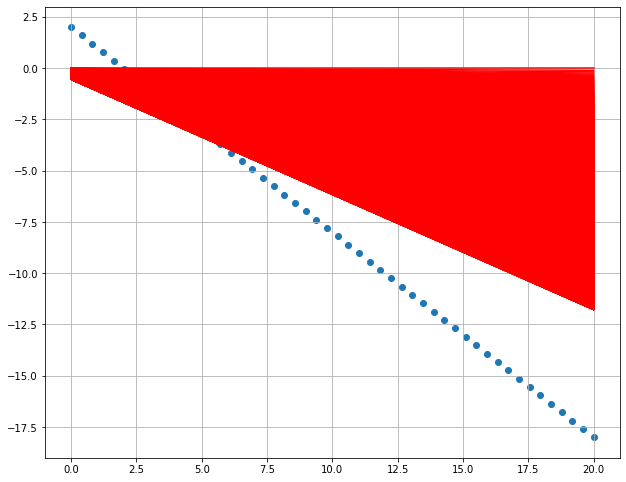

In [16]:
plt.scatter(X, y)
plt.grid()

for y_hat in preds:
  plt.plot(X, y_hat, color='r');

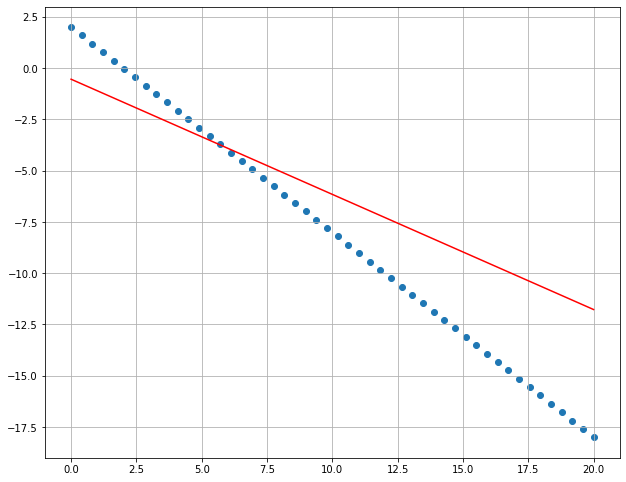

In [17]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='r');
plt.grid()

##### The following results uses alpha = 0.0005, epsilon =  1e-08, and max. iterations = 5000.

In [18]:
theta_0_upd, theta_1_upd, loss, preds = adaGrad(X, y, 0.0005, 1e-08, 5000)

Streaming output truncated to the last 5000 lines.
h(x):[-0.05302221 -0.07468812 -0.09635404 -0.11801995 -0.13968587 -0.16135178
 -0.1830177  -0.20468361 -0.22634953 -0.24801544 -0.26968136 -0.29134727
 -0.31301318 -0.3346791  -0.35634501 -0.37801093 -0.39967684 -0.42134276
 -0.44300867 -0.46467459 -0.4863405  -0.50800642 -0.52967233 -0.55133825
 -0.57300416 -0.59467008 -0.61633599 -0.63800191 -0.65966782 -0.68133374
 -0.70299965 -0.72466557 -0.74633148 -0.7679974  -0.78966331 -0.81132922
 -0.83299514 -0.85466105 -0.87632697 -0.89799288 -0.9196588  -0.94132471
 -0.96299063 -0.98465654 -1.00632246 -1.02798837 -1.04965429 -1.0713202
 -1.09298612 -1.11465203]

Error Vector: 
[-2.05302221 -1.66652486 -1.28002751 -0.89353016 -0.50703281 -0.12053545
  0.2659619   0.65245925  1.0389566   1.42545395  1.8119513   2.19844865
  2.584946    2.97144335  3.3579407   3.74443805  4.1309354   4.51743275
  4.9039301   5.29042745  5.6769248   6.06342215  6.4499195   6.83641685
  7.22291421  7.60941156  7

In [19]:
y_pred = theta_0_upd[-1] +  (X * theta_1_upd[-1])
r2_score(y, y_pred)

-1.4736441832884104

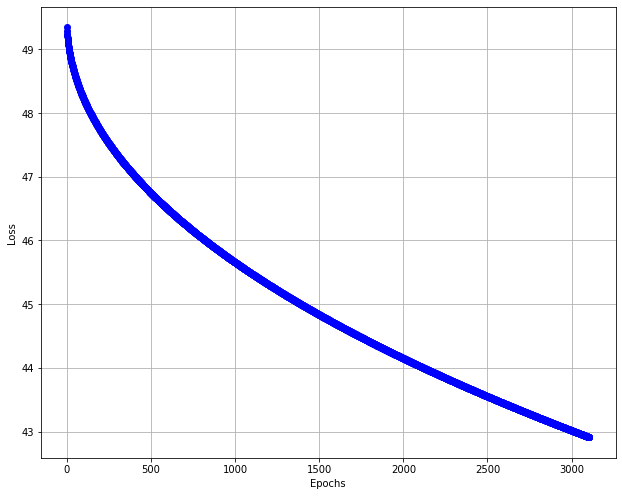

In [20]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss, marker = 'o', color='b');

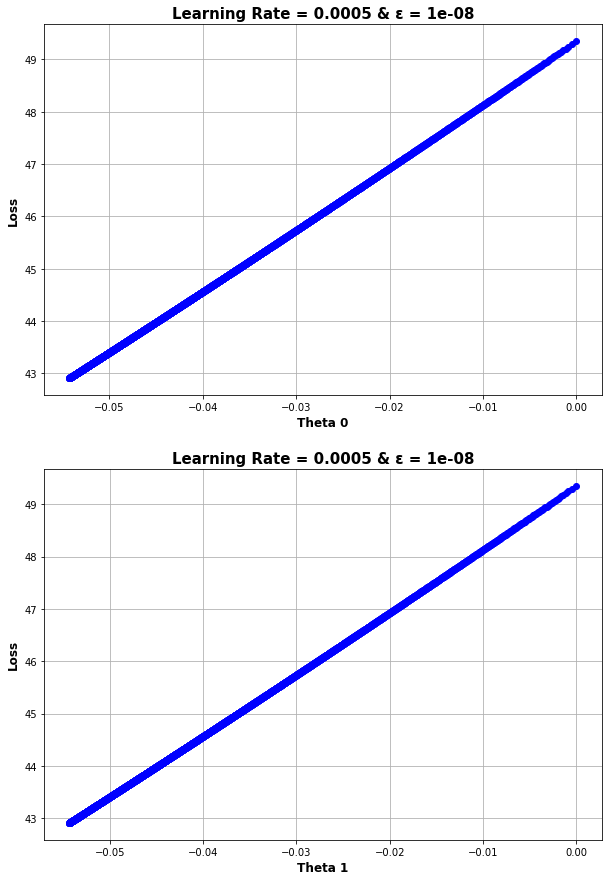

In [21]:
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))

ax1.set_title('Learning Rate = 0.0005 & ε = 1e-08', fontweight='bold', fontsize=15)
ax1.set_xlabel('Theta 0', fontweight='bold', fontsize=12)
ax1.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax1.grid()


ax1.plot(theta_0_upd, loss, marker = 'o', color='b')

ax2.set_title('Learning Rate = 0.0005 & ε = 1e-08', fontweight='bold', fontsize=15)
ax2.set_xlabel('Theta 1', fontweight='bold', fontsize=12)
ax2.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax2.grid()

ax2.plot(theta_1_upd, loss, marker = 'o', color='b');

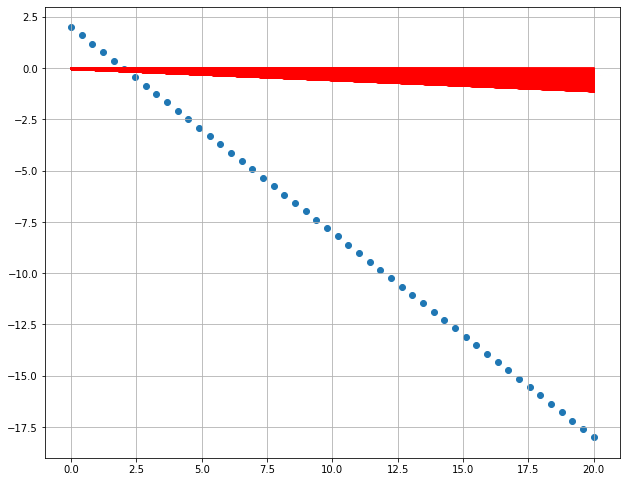

In [22]:
plt.scatter(X, y)
plt.grid()

for y_hat in preds:
  plt.plot(X, y_hat, color='r');

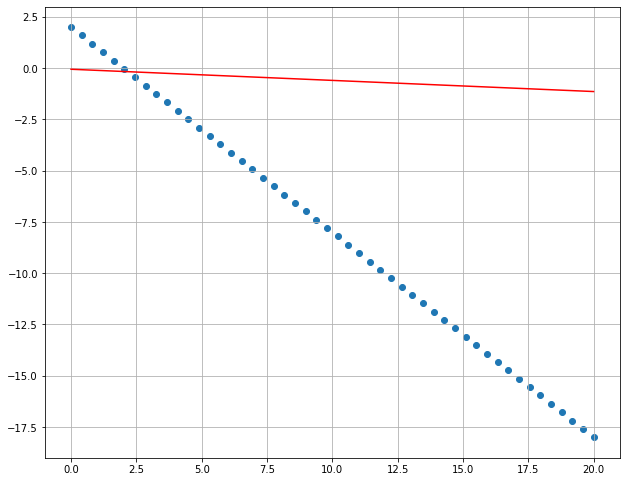

In [23]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='r');
plt.grid()

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

In [24]:
def RMSProp(features, target, lr, decay_rate, epsilon, max_iter):

  theta_0_upd, theta_1_upd, loss, preds = ([] for i in range(4))

  n_samp = len(features)

  theta_0, theta_1  = 0, 0
  psum_theta_0, psum_theta_1 = 0, 0

  for i in range(max_iter):

    if( i > 2 and abs(loss[-2]-loss[-1]) < 0.001):
      break

    print('\n')
    print('*'*18 + ' Iteration ' + str(i) + ' ' + '*'*20 )
    print('\n')

    theta_0_upd.append(theta_0)
    theta_1_upd.append(theta_1)

    h_x = theta_0 + (features * theta_1)

    preds.append(h_x)

    print('h(x):{}'.format(h_x))

    err = h_x - target
    cost = (err@err) / (2*n_samp)

    loss.append(cost)

    print('\nError Vector: \n{}\n\n j = {}\n'.format(err, cost))


    d_theta_0 = (err.sum()) / n_samp
    d_theta_1 = (err @ features) / n_samp


    psum_theta_0 = (decay_rate * psum_theta_0) + ((1 - decay_rate) * (d_theta_0)**2)
    psum_theta_1 = (decay_rate * psum_theta_1) + ((1 - decay_rate) * (d_theta_1)**2)

    grad_vec = np.asarray([d_theta_0, d_theta_1])

    print('\nGradient Vector :', grad_vec)

    grad_norm = np.linalg.norm(grad_vec)

    print('\nGradient Vector Norm:', grad_norm)

    if(grad_norm <= 0.001):
      break

    theta_0 = theta_0 - ((lr * d_theta_0) / (np.sqrt(psum_theta_0) + epsilon))
    theta_1 = theta_1 - ((lr * d_theta_1) / (np.sqrt(psum_theta_1) + epsilon))

    print('\ntheta_0_new : {}\ntheta_1_new : {}'.format(theta_0, theta_1))
  
  return theta_0_upd, theta_1_upd, loss, preds


##### The following results uses alpha = 0.05, beta = 0.9, epsilon =  1e-08, and max. iterations = 500.

In [25]:
theta_0_upd, theta_1_upd, loss, preds = RMSProp(X, y, 0.05, 0.9, 1e-08, 500)



****************** Iteration 0 ********************


h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector: 
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

 j = 49.34693877551021


Gradient Vector : [  8.         114.69387755]

Gradient Vector Norm: 114.97254258164628

theta_0_new : -0.158113882383419
theta_1_new 

In [26]:
y_pred = theta_0_upd[-1] +  (X * theta_1_upd[-1])
r2_score(y, y_pred)

0.9993328514667263

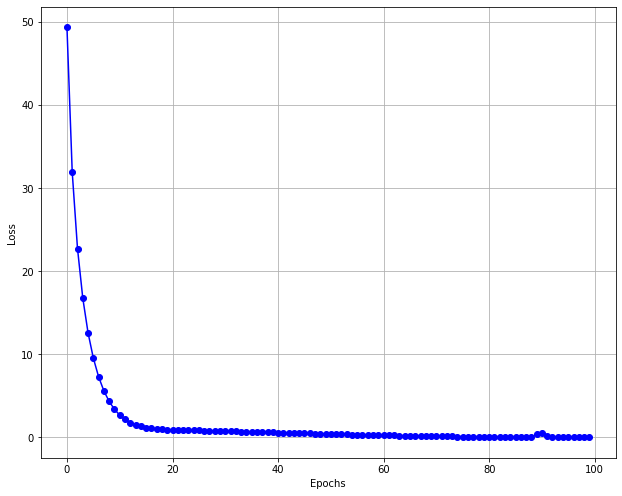

In [27]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss, marker = 'o', color='b');

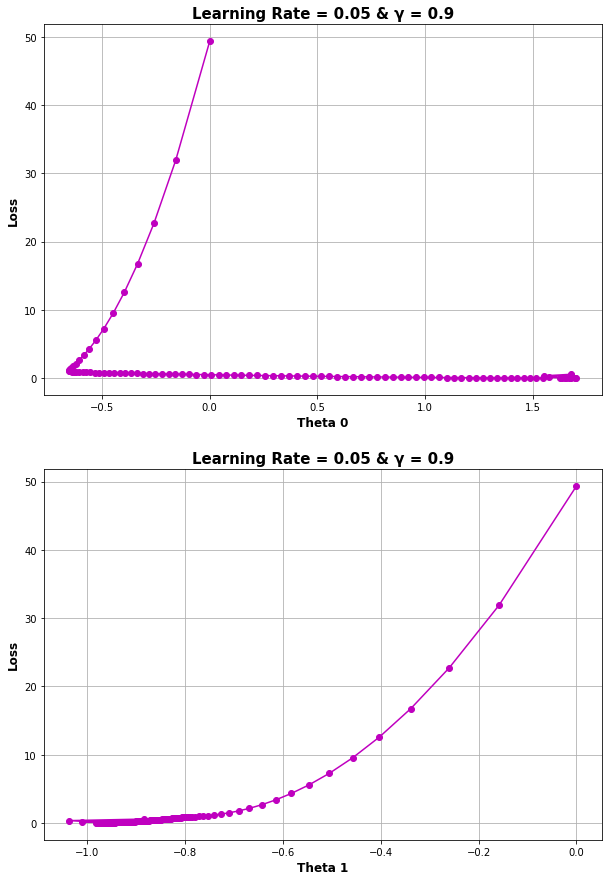

In [28]:
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))

ax1.set_title('Learning Rate = 0.05 & γ = 0.9', fontweight='bold', fontsize=15)
ax1.set_xlabel('Theta 0', fontweight='bold', fontsize=12)
ax1.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax1.grid()


ax1.plot(theta_0_upd, loss, marker = 'o', color='m')

ax2.set_title('Learning Rate = 0.05 & γ = 0.9', fontweight='bold', fontsize=15)
ax2.set_xlabel('Theta 1', fontweight='bold', fontsize=12)
ax2.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax2.grid()

ax2.plot(theta_1_upd, loss, marker = 'o', color='m');

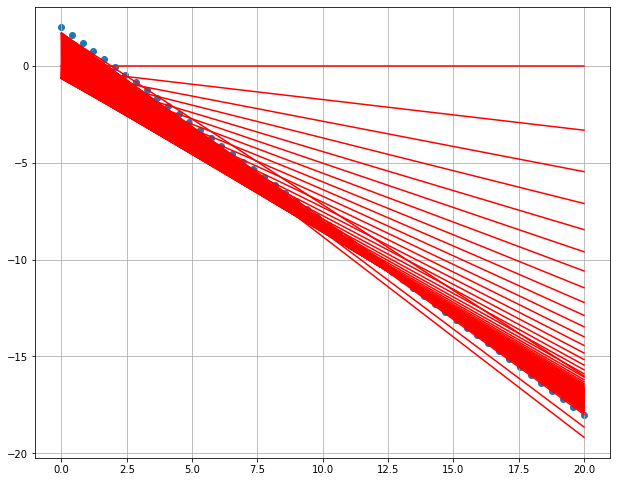

In [29]:
plt.scatter(X, y)
plt.grid()

for y_hat in preds:
  plt.plot(X, y_hat, color='r');

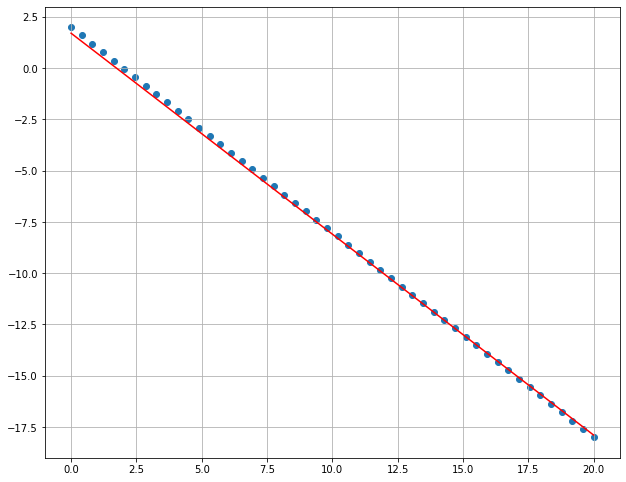

In [30]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='r');
plt.grid()

##### The following results uses alpha = 0.005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

In [31]:
theta_0_upd, theta_1_upd, loss, preds = RMSProp(X, y, 0.005, 0.9, 1e-08, 5000)

Streaming output truncated to the last 5000 lines.

h(x):[  0.52237168   0.15804261  -0.20628646  -0.57061554  -0.93494461
  -1.29927368  -1.66360276  -2.02793183  -2.3922609   -2.75658998
  -3.12091905  -3.48524812  -3.8495772   -4.21390627  -4.57823535
  -4.94256442  -5.30689349  -5.67122257  -6.03555164  -6.39988071
  -6.76420979  -7.12853886  -7.49286793  -7.85719701  -8.22152608
  -8.58585515  -8.95018423  -9.3145133   -9.67884237 -10.04317145
 -10.40750052 -10.7718296  -11.13615867 -11.50048774 -11.86481682
 -12.22914589 -12.59347496 -12.95780404 -13.32213311 -13.68646218
 -14.05079126 -14.41512033 -14.7794494  -15.14377848 -15.50810755
 -15.87243662 -16.2367657  -16.60109477 -16.96542385 -17.32975292]

Error Vector: 
[-1.47762832 -1.43379412 -1.38995993 -1.34612574 -1.30229155 -1.25845736
 -1.21462316 -1.17078897 -1.12695478 -1.08312059 -1.0392864  -0.99545221
 -0.95161801 -0.90778382 -0.86394963 -0.82011544 -0.77628125 -0.73244706
 -0.68861286 -0.64477867 -0.60094448 -0.5571102

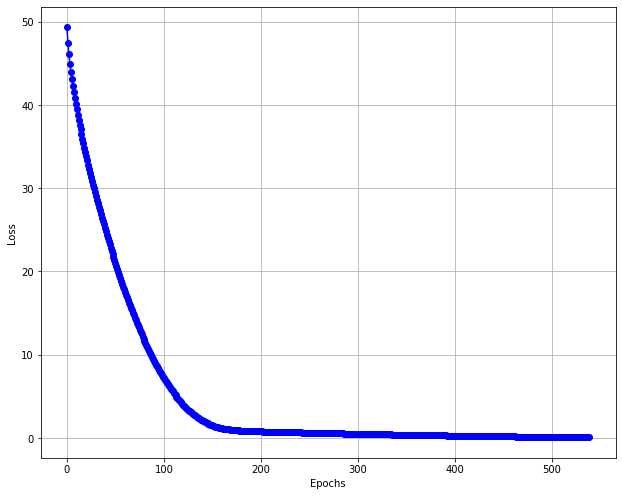

In [32]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss, marker = 'o', color='b');

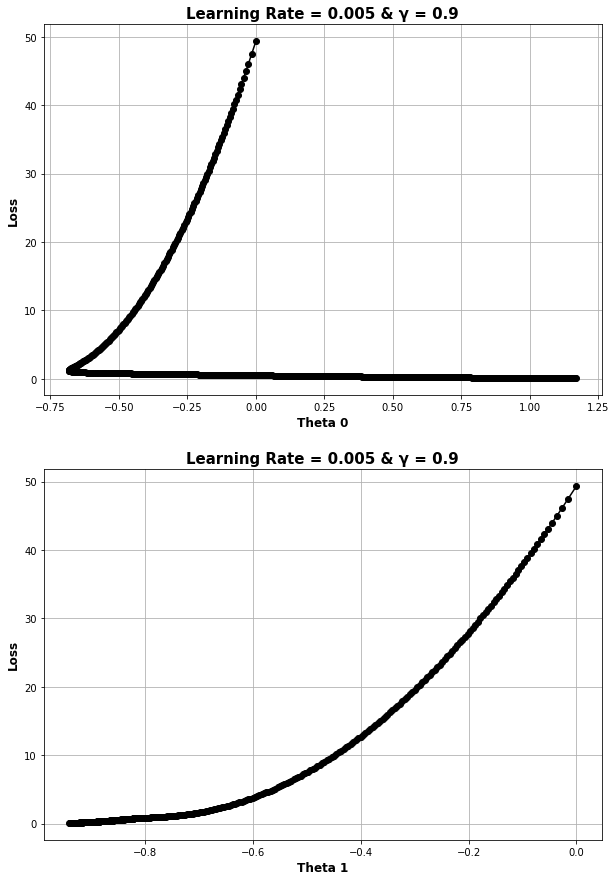

In [33]:
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))

ax1.set_title('Learning Rate = 0.005 & γ = 0.9', fontweight='bold', fontsize=15)
ax1.set_xlabel('Theta 0', fontweight='bold', fontsize=12)
ax1.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax1.grid()


ax1.plot(theta_0_upd, loss, marker = 'o', color='black')

ax2.set_title('Learning Rate = 0.005 & γ = 0.9', fontweight='bold', fontsize=15)
ax2.set_xlabel('Theta 1', fontweight='bold', fontsize=12)
ax2.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax2.grid()

ax2.plot(theta_1_upd, loss, marker = 'o', color='black');

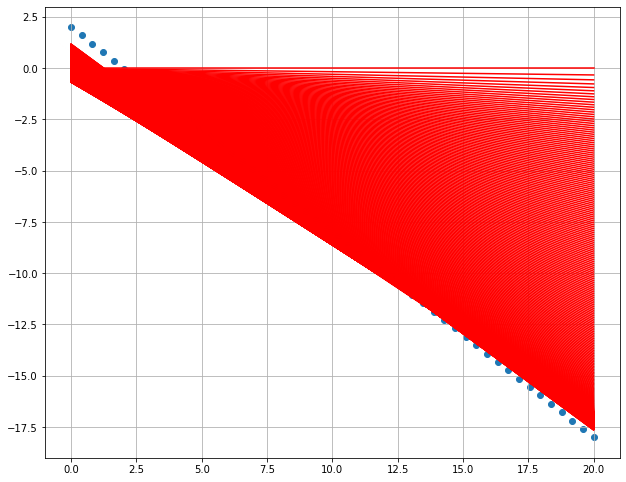

In [34]:
plt.scatter(X, y)
plt.grid()

for y_hat in preds:
  plt.plot(X, y_hat, color='r');

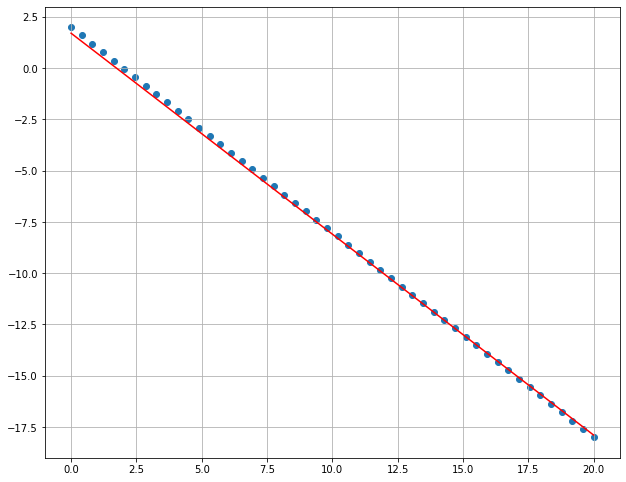

In [35]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='r');
plt.grid()

##### The following results uses alpha = 0.0005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

In [36]:
theta_0_upd, theta_1_upd, loss, preds = RMSProp(X, y, 0.0005, 0.9, 1e-08, 5000)

Streaming output truncated to the last 5000 lines.


Gradient Vector : [-4.87803766e-03  9.35458856e+00]

Gradient Vector Norm: 9.354589835499514

theta_0_new : -0.7152211002074875
theta_1_new : -0.729431297890859


****************** Iteration 1472 ********************


h(x):[ -0.7152211   -1.01294816  -1.31067522  -1.60840228  -1.90612934
  -2.2038564   -2.50158346  -2.79931052  -3.09703758  -3.39476464
  -3.6924917   -3.99021876  -4.28794582  -4.58567288  -4.88339995
  -5.18112701  -5.47885407  -5.77658113  -6.07430819  -6.37203525
  -6.66976231  -6.96748937  -7.26521643  -7.56294349  -7.86067055
  -8.15839761  -8.45612467  -8.75385173  -9.05157879  -9.34930585
  -9.64703291  -9.94475997 -10.24248703 -10.54021409 -10.83794115
 -11.13566821 -11.43339527 -11.73112233 -12.02884939 -12.32657645
 -12.62430351 -12.92203058 -13.21975764 -13.5174847  -13.81521176
 -14.11293882 -14.41066588 -14.70839294 -15.00612    -15.30384706]

Error Vector: 
[-2.7152211  -2.6047849  -2.49434869 -2.38391

In [37]:
y_pred = theta_0_upd[-1] +  (X * theta_1_upd[-1])
r2_score(y, y_pred)

0.9476184845511563

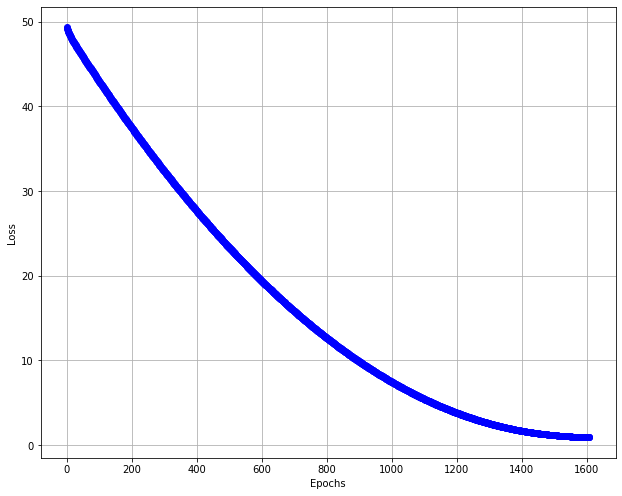

In [38]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss, marker = 'o', color='b');

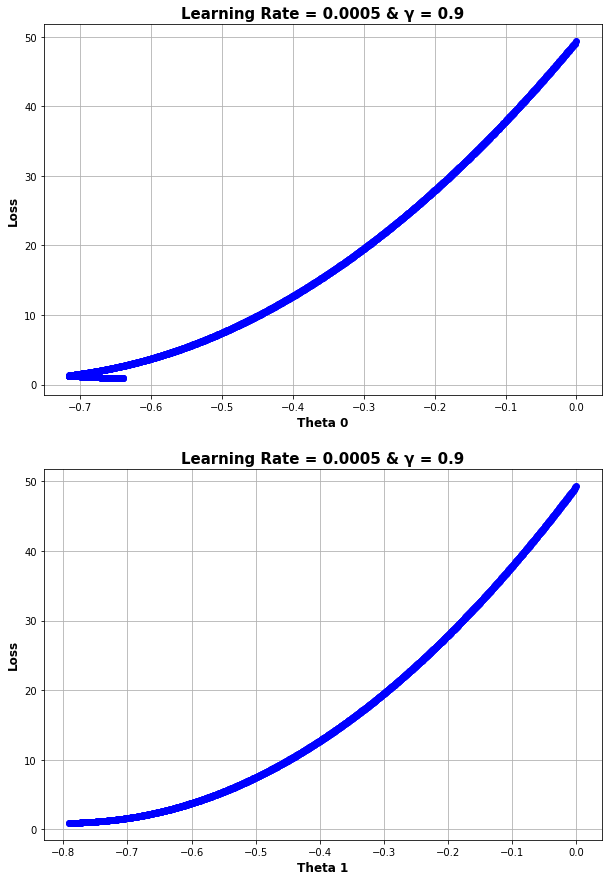

In [39]:
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))

ax1.set_title('Learning Rate = 0.0005 & γ = 0.9', fontweight='bold', fontsize=15)
ax1.set_xlabel('Theta 0', fontweight='bold', fontsize=12)
ax1.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax1.grid()


ax1.plot(theta_0_upd, loss, marker = 'o', color='b')

ax2.set_title('Learning Rate = 0.0005 & γ = 0.9', fontweight='bold', fontsize=15)
ax2.set_xlabel('Theta 1', fontweight='bold', fontsize=12)
ax2.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax2.grid()

ax2.plot(theta_1_upd, loss, marker = 'o', color='b');

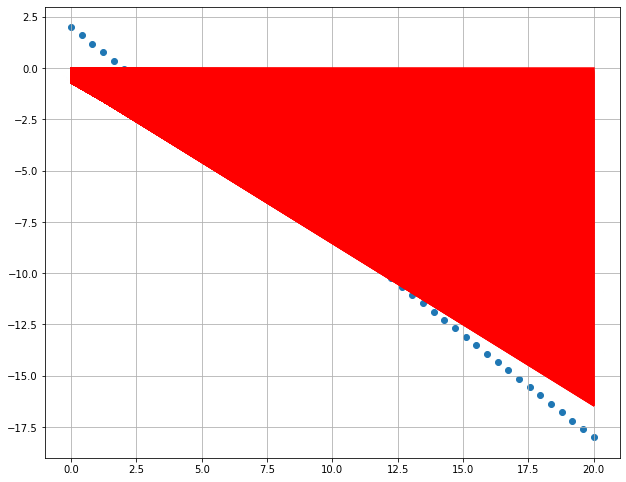

In [40]:
plt.scatter(X, y)
plt.grid()

for y_hat in preds:
  plt.plot(X, y_hat, color='r');

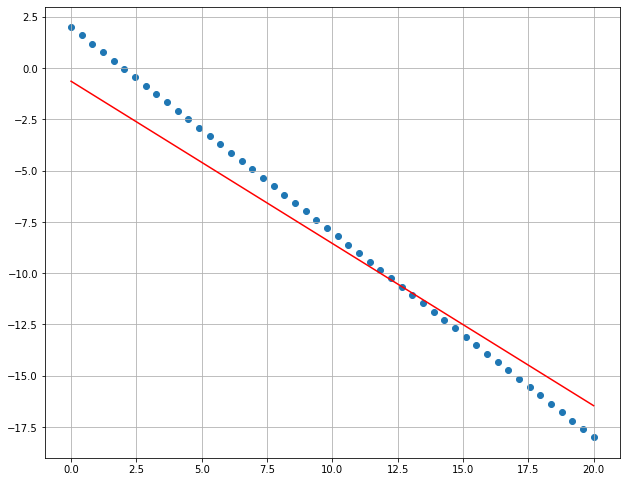

In [41]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='r');
plt.grid()

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

In [42]:
def adam(features, target, lr,beta_1, beta_2,  epsilon, max_iter):

  theta_0_upd, theta_1_upd, loss, preds = ([] for i in range(4))

  n_samp = len(features)

  theta_0, theta_1  = 0, 0
  mom_theta_0, mom_theta_1, rms_theta_0, rms_theta_1 = 0, 0, 0, 0

  for i in range(max_iter):

    if( i > 2 and abs(loss[-2]-loss[-1]) < 0.001):
      break

    print('\n')
    print('*'*18 + ' Iteration ' + str(i) + ' ' + '*'*20 )
    print('\n')

    theta_0_upd.append(theta_0)
    theta_1_upd.append(theta_1)

    h_x = theta_0 + (features * theta_1)

    preds.append(h_x)

    print('h(x):{}'.format(h_x))

    err = h_x - target
    cost = (err@err) / (2*n_samp)

    loss.append(cost)

    print('\nError Vector: \n{}\n\n j = {}\n'.format(err, cost))


    d_theta_0 = (err.sum()) / n_samp
    d_theta_1 = (err @ features) / n_samp


    mom_theta_0 = (beta_1 * mom_theta_0) + ((1-beta_1) * d_theta_0)
    mom_theta_1 = (beta_1 * mom_theta_1) + ((1-beta_1) * d_theta_1)

    rms_theta_0 = (beta_2 * rms_theta_0) + ((1-beta_2) * (d_theta_0)**2)
    rms_theta_1 = (beta_2 * rms_theta_1) + ((1-beta_2) * (d_theta_1)**2)

    mom_corr_0 = mom_theta_0 / (1-(beta_1)**(i+1))
    mom_corr_1 = mom_theta_1 / (1-(beta_1)**(i+1))

    rms_corr_0 = rms_theta_0 / (1-(beta_2)**(i+1))
    rms_corr_1 = rms_theta_1 / (1-(beta_2)**(i+1))

    grad_vec = np.asarray([d_theta_0, d_theta_1])

    print('\nGradient Vector :', grad_vec)

    grad_norm = np.linalg.norm(grad_vec)

    print('\nGradient Vector Norm:', grad_norm)

    if(grad_norm <= 0.001):
      break

    print('m_0_0:', mom_theta_0)
    print('m_1_0:', mom_theta_1, '\n')
    print('m_0_0_corr:', mom_corr_0)
    print('m_1_0_corr:', mom_corr_1, '\n')

    print('v_0_0:', rms_theta_0)
    print('v_1_0:', rms_theta_1, '\n')
    print('v_0_0_corr:', rms_corr_0)
    print('v_1_0_corr:', rms_corr_1,)

    theta_0 = theta_0 - ((lr * mom_corr_0) / (np.sqrt(rms_corr_0) + epsilon))
    theta_1 = theta_1 - ((lr * mom_corr_1) / (np.sqrt(rms_corr_1) + epsilon))


    print('\ntheta_0_new : {}\ntheta_1_new : {}'.format(theta_0, theta_1))
  
  return theta_0_upd, theta_1_upd, loss, preds


In [43]:
6.4 / (1-(0.2)**1)

8.0

##### The following results uses alpha = 0.05, beta1 = 0.2, beta2 = 0.7, epsilon =  1e-08, and max. iterations = 500.

In [44]:
theta_0_upd, theta_1_upd, loss, preds = adam(X, y, 0.05, 0.2, 0.7, 1e-08, 500)



****************** Iteration 0 ********************


h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector: 
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

 j = 49.34693877551021


Gradient Vector : [  8.         114.69387755]

Gradient Vector Norm: 114.97254258164628
m_0_0: 6.4
m_1_0: 91.75510204081634 

m_0_0_co

In [45]:
y_pred = theta_0_upd[-1] +  (X * theta_1_upd[-1])
r2_score(y, y_pred)

0.9989675218213947

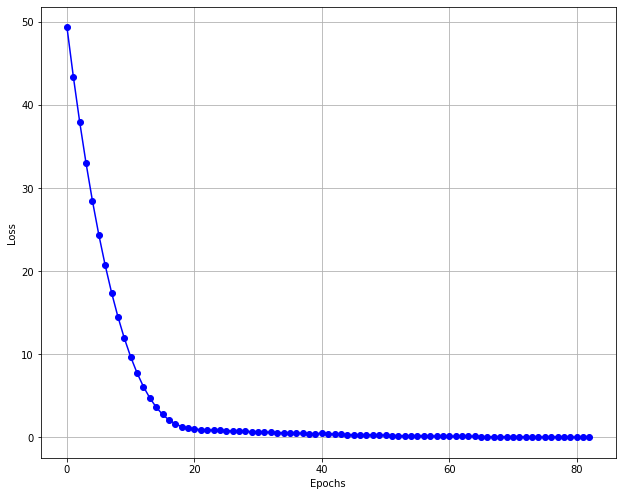

In [46]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss, marker = 'o', color='b');

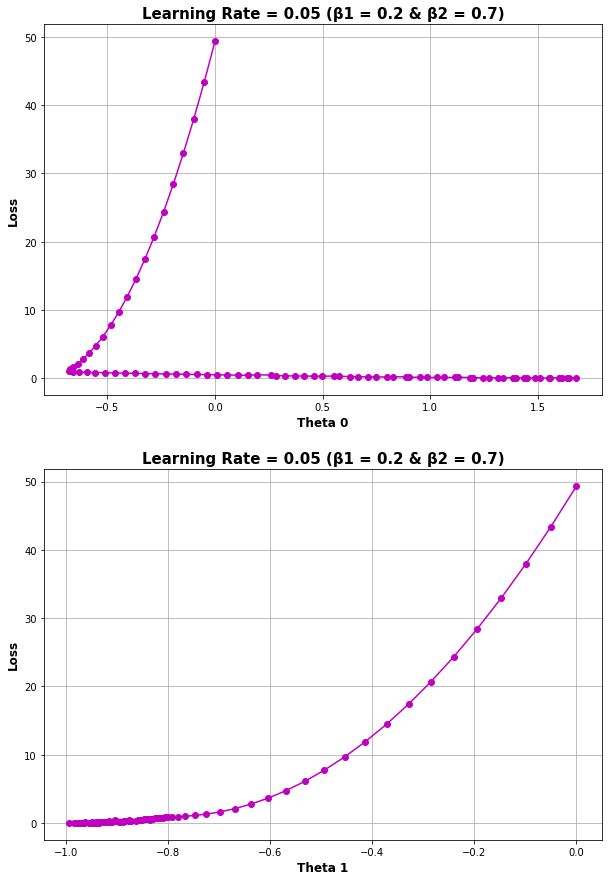

In [47]:
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))

ax1.set_title('Learning Rate = 0.05 (β1 = 0.2 & β2 = 0.7)', fontweight='bold', fontsize=15)
ax1.set_xlabel('Theta 0', fontweight='bold', fontsize=12)
ax1.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax1.grid()


ax1.plot(theta_0_upd, loss, marker = 'o', color='m')

ax2.set_title('Learning Rate = 0.05 (β1 = 0.2 & β2 = 0.7)', fontweight='bold', fontsize=15)
ax2.set_xlabel('Theta 1', fontweight='bold', fontsize=12)
ax2.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax2.grid()

ax2.plot(theta_1_upd, loss, marker = 'o', color='m');

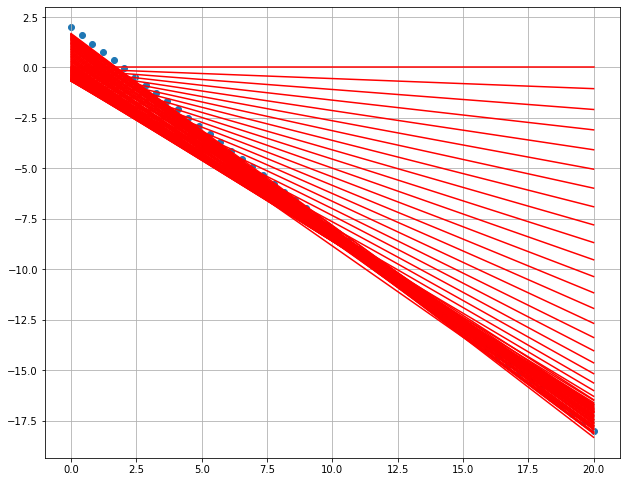

In [48]:
plt.scatter(X, y)
plt.grid()

for y_hat in preds:
  plt.plot(X, y_hat, color='r');

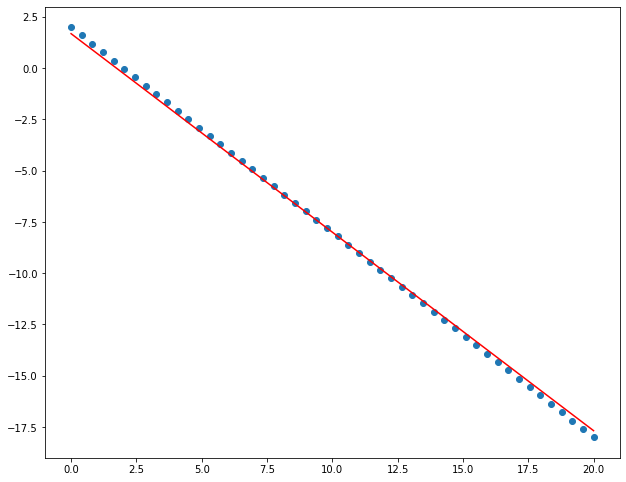

In [49]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='r');

##### The following results uses alpha = 0.005, beta1 = 0.5, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 500.

In [50]:
theta_0_upd, theta_1_upd, loss, preds = adam(X, y, 0.005, 0.5, 0.8, 1e-08, 500)

Streaming output truncated to the last 5000 lines.
v_0_0_corr: 0.15703673110833055
v_1_0_corr: 0.009877456069516512

theta_0_new : 0.49019354221831074
theta_1_new : -0.8860595366656424


****************** Iteration 395 ********************


h(x):[  0.49019354   0.12853659  -0.23312037  -0.59477732  -0.95643427
  -1.31809123  -1.67974818  -2.04140513  -2.40306209  -2.76471904
  -3.126376    -3.48803295  -3.8496899   -4.21134686  -4.57300381
  -4.93466076  -5.29631772  -5.65797467  -6.01963163  -6.38128858
  -6.74294553  -7.10460249  -7.46625944  -7.82791639  -8.18957335
  -8.5512303   -8.91288726  -9.27454421  -9.63620116  -9.99785812
 -10.35951507 -10.72117202 -11.08282898 -11.44448593 -11.80614288
 -12.16779984 -12.52945679 -12.89111375 -13.2527707  -13.61442765
 -13.97608461 -14.33774156 -14.69939851 -15.06105547 -15.42271242
 -15.78436938 -16.14602633 -16.50768328 -16.86934024 -17.23099719]

Error Vector: 
[-1.50980646 -1.46330015 -1.41679383 -1.37028752 -1.32378121 -1.2772749
 -1

In [51]:
y_pred = theta_0_upd[-1] +  (X * theta_1_upd[-1])
r2_score(y, y_pred)

0.9926267207526386

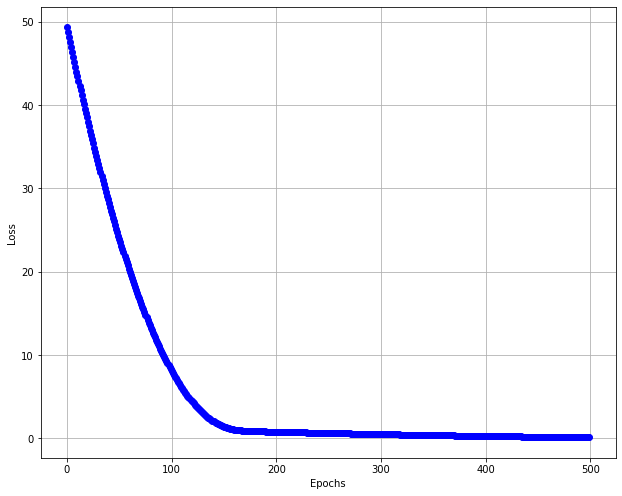

In [52]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss, marker = 'o', color='b');

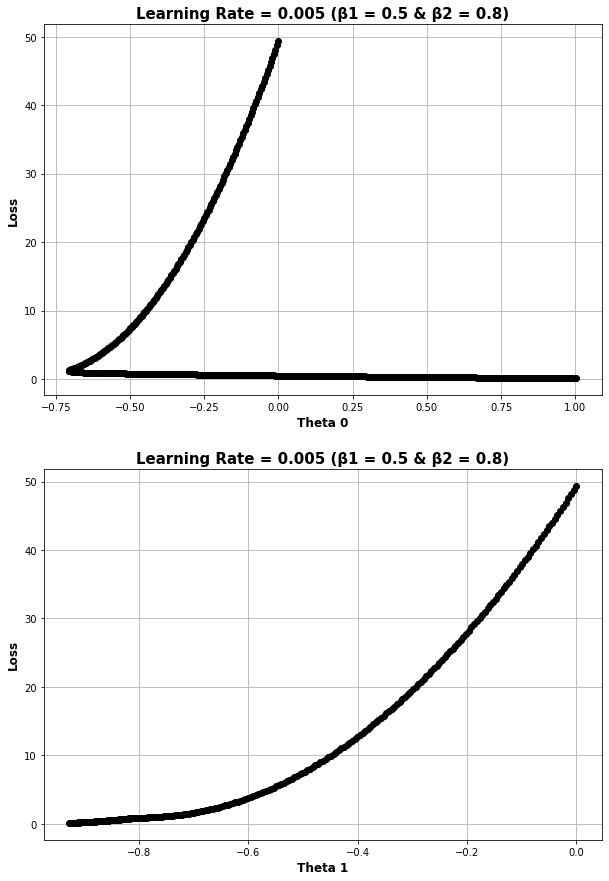

In [53]:
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))

ax1.set_title('Learning Rate = 0.005 (β1 = 0.5 & β2 = 0.8)', fontweight='bold', fontsize=15)
ax1.set_xlabel('Theta 0', fontweight='bold', fontsize=12)
ax1.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax1.grid()


ax1.plot(theta_0_upd, loss, marker = 'o', color='black')

ax2.set_title('Learning Rate = 0.005 (β1 = 0.5 & β2 = 0.8)', fontweight='bold', fontsize=15)
ax2.set_xlabel('Theta 1', fontweight='bold', fontsize=12)
ax2.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax2.grid()

ax2.plot(theta_1_upd, loss, marker = 'o', color='black');

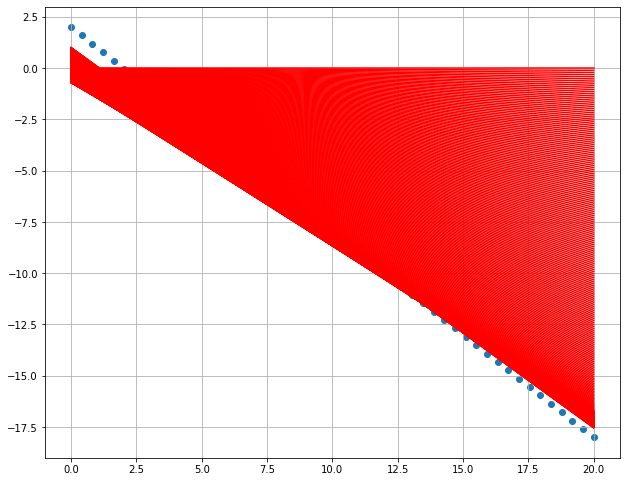

In [54]:
plt.scatter(X, y)
plt.grid()

for y_hat in preds:
  plt.plot(X, y_hat, color='r');

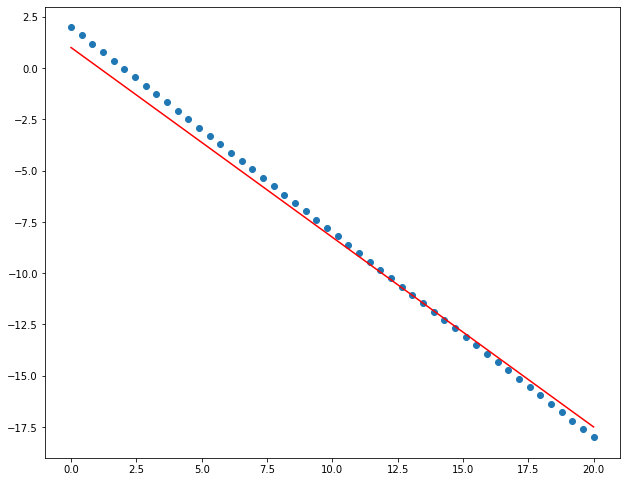

In [55]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='r');

##### The following results uses alpha = 0.0005, beta1 = 0.8, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 5000.

In [56]:
theta_0_upd, theta_1_upd, loss, preds = adam(X, y, 0.0005, 0.8, 0.8, 1e-08, 5000)

Streaming output truncated to the last 5000 lines.
  -8.26506282  -8.56688294  -8.86870306  -9.17052318  -9.4723433
  -9.77416342 -10.07598354 -10.37780366 -10.67962378 -10.98144389
 -11.28326401 -11.58508413 -11.88690425 -12.18872437 -12.49054449
 -12.79236461 -13.09418473 -13.39600485 -13.69782497 -13.99964509
 -14.30146521 -14.60328533 -14.90510545 -15.20692556 -15.50874568]

Error Vector: 
[-2.71955984 -2.61321669 -2.50687355 -2.4005304  -2.29418725 -2.18784411
 -2.08150096 -1.97515782 -1.86881467 -1.76247152 -1.65612838 -1.54978523
 -1.44344209 -1.33709894 -1.23075579 -1.12441265 -1.0180695  -0.91172636
 -0.80538321 -0.69904006 -0.59269692 -0.48635377 -0.38001063 -0.27366748
 -0.16732433 -0.06098119  0.04536196  0.1517051   0.25804825  0.3643914
  0.47073454  0.57707769  0.68342083  0.78976398  0.89610713  1.00245027
  1.10879342  1.21513656  1.32147971  1.42782286  1.534166    1.64050915
  1.74685229  1.85319544  1.95953859  2.06588173  2.17222488  2.27856802
  2.38491117  2.4912

In [57]:
y_pred = theta_0_upd[-1] +  (X * theta_1_upd[-1])
r2_score(y, y_pred)

0.9467806664066584

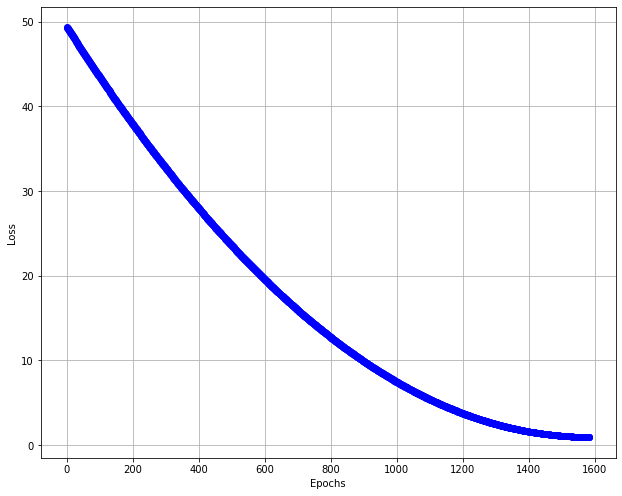

In [58]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss, marker = 'o', color='b');

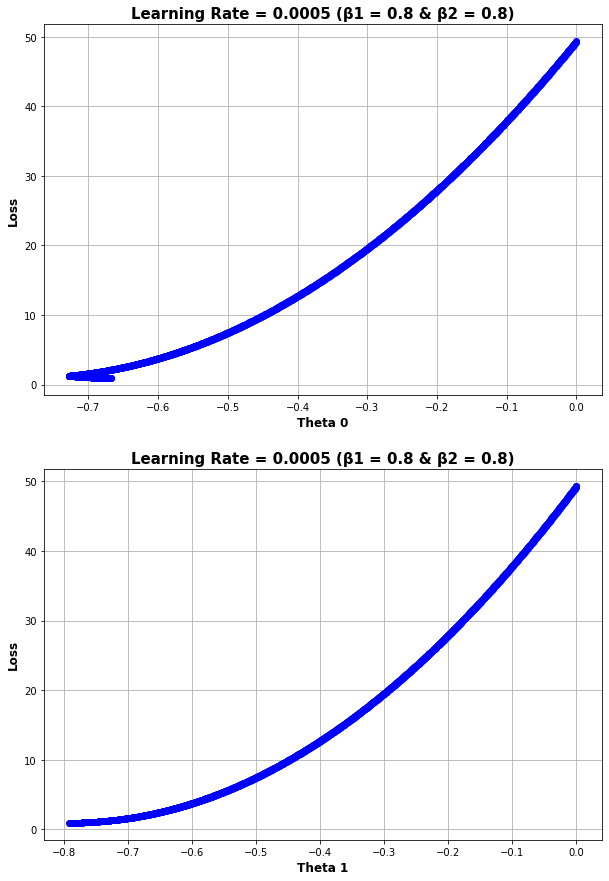

In [59]:
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))

ax1.set_title('Learning Rate = 0.0005 (β1 = 0.8 & β2 = 0.8)', fontweight='bold', fontsize=15)
ax1.set_xlabel('Theta 0', fontweight='bold', fontsize=12)
ax1.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax1.grid()


ax1.plot(theta_0_upd, loss, marker = 'o', color='b')

ax2.set_title('Learning Rate = 0.0005 (β1 = 0.8 & β2 = 0.8)', fontweight='bold', fontsize=15)
ax2.set_xlabel('Theta 1', fontweight='bold', fontsize=12)
ax2.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax2.grid()

ax2.plot(theta_1_upd, loss, marker = 'o', color='b');

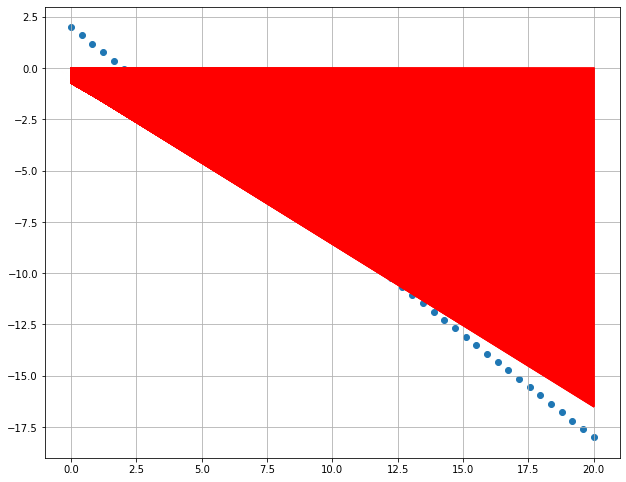

In [60]:
plt.scatter(X, y)
plt.grid()

for y_hat in preds:
  plt.plot(X, y_hat, color='r');

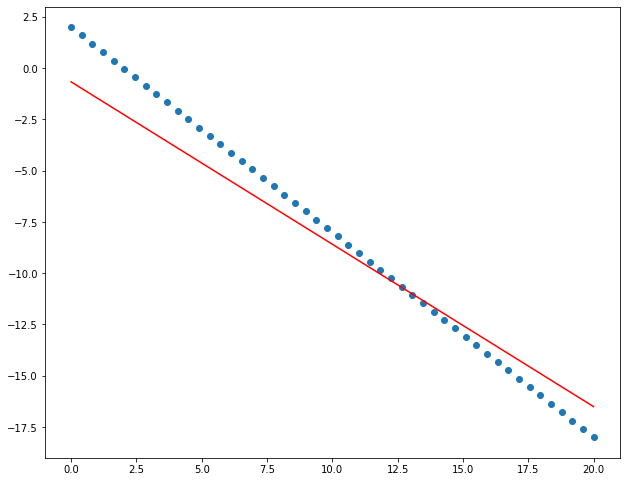

In [61]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='r');

### Play with the parameters and see the results

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [62]:
theta_0_upd, theta_1_upd, loss, preds = adam(X, y, 0.001, 0.9, 0.99, 1e-08, 5000)

Streaming output truncated to the last 5000 lines.
  -8.37073584  -8.67900456  -8.98727328  -9.295542    -9.60381072
  -9.91207944 -10.22034816 -10.52861688 -10.8368856  -11.14515432
 -11.45342304 -11.76169176 -12.06996048 -12.3782292  -12.68649792
 -12.99476664 -13.30303536 -13.61130408 -13.9195728  -14.22784152
 -14.53611024 -14.84437896 -15.15264768 -15.4609164  -15.76918512]

Error Vector: 
[-2.66401784 -2.5641233  -2.46422875 -2.36433421 -2.26443966 -2.16454512
 -2.06465057 -1.96475603 -1.86486148 -1.76496694 -1.66507239 -1.56517785
 -1.4652833  -1.36538875 -1.26549421 -1.16559966 -1.06570512 -0.96581057
 -0.86591603 -0.76602148 -0.66612694 -0.56623239 -0.46633785 -0.3664433
 -0.26654876 -0.16665421 -0.06675967  0.03313488  0.13302943  0.23292397
  0.33281852  0.43271306  0.53260761  0.63250215  0.7323967   0.83229124
  0.93218579  1.03208033  1.13197488  1.23186942  1.33176397  1.43165851
  1.53155306  1.63144761  1.73134215  1.8312367   1.93113124  2.03102579
  2.13092033  2.230

In [63]:
y_pred = theta_0_upd[-1] +  (X * theta_1_upd[-1])
r2_score(y, y_pred)

0.9485667803280174

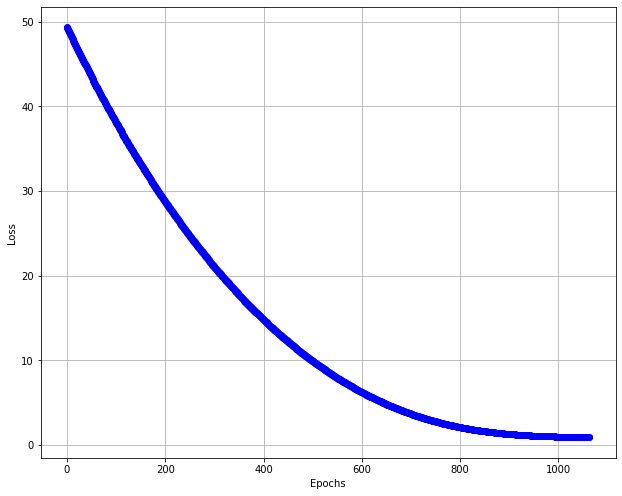

In [64]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss, marker = 'o', color='b');

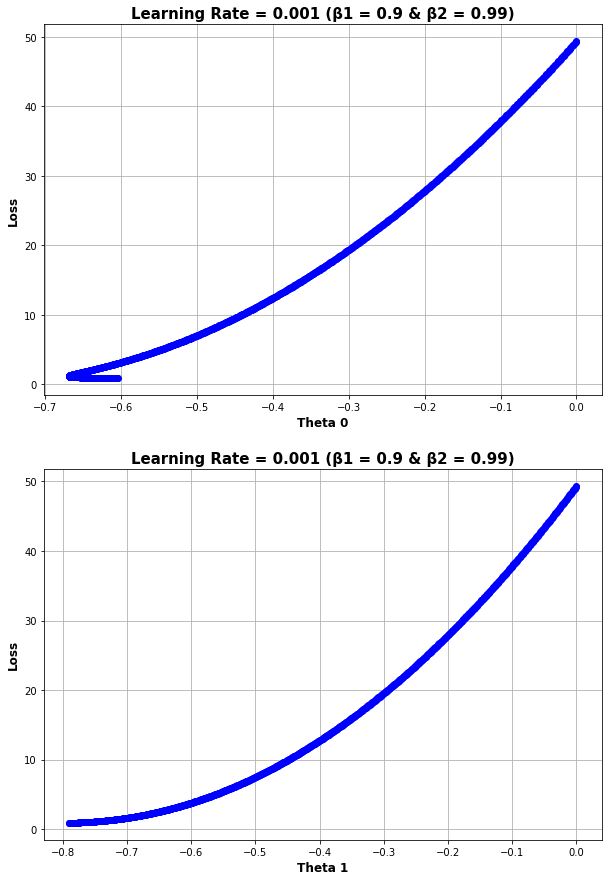

In [65]:
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))

ax1.set_title('Learning Rate = 0.001 (β1 = 0.9 & β2 = 0.99)', fontweight='bold', fontsize=15)
ax1.set_xlabel('Theta 0', fontweight='bold', fontsize=12)
ax1.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax1.grid()


ax1.plot(theta_0_upd, loss, marker = 'o', color='b')

ax2.set_title('Learning Rate = 0.001 (β1 = 0.9 & β2 = 0.99)', fontweight='bold', fontsize=15)
ax2.set_xlabel('Theta 1', fontweight='bold', fontsize=12)
ax2.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax2.grid()

ax2.plot(theta_1_upd, loss, marker = 'o', color='b');

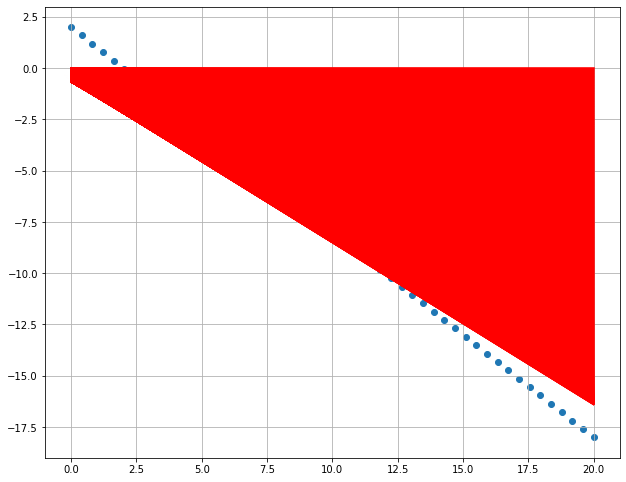

In [66]:
plt.scatter(X, y)
plt.grid()

for y_hat in preds:
  plt.plot(X, y_hat, color='r');

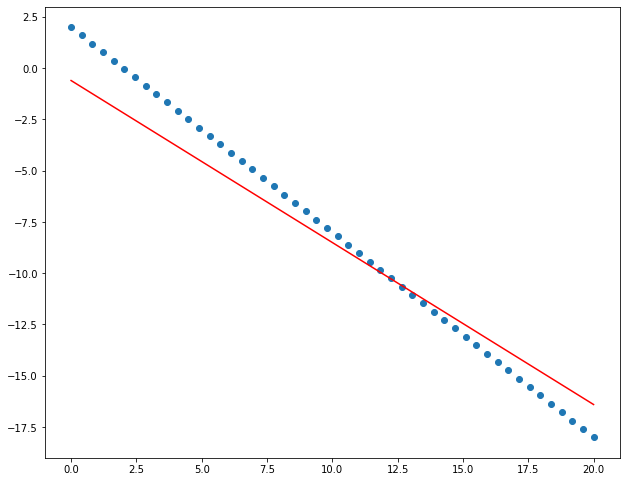

In [67]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='r');

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [68]:
theta_0_upd, theta_1_upd, loss, preds = adam(X, y, 0.001, 0.9, 0.5, 1e-08, 5000)

Streaming output truncated to the last 5000 lines.
  -6.13138227  -6.40426401  -6.67714576  -6.95002751  -7.22290926
  -7.49579101  -7.76867276  -8.04155451  -8.31443626  -8.587318
  -8.86019975  -9.1330815   -9.40596325  -9.678845    -9.95172675
 -10.2246085  -10.49749025 -10.77037199 -11.04325374 -11.31613549
 -11.58901724 -11.86189899 -12.13478074 -12.40766249 -12.68054424
 -12.95342598 -13.22630773 -13.49918948 -13.77207123 -14.04495298]

Error Vector: 
[-2.67374729 -2.53846578 -2.40318426 -2.26790274 -2.13262123 -1.99733971
 -1.86205819 -1.72677668 -1.59149516 -1.45621364 -1.32093213 -1.18565061
 -1.05036909 -0.91508758 -0.77980606 -0.64452454 -0.50924303 -0.37396151
 -0.23867999 -0.10339848  0.03188304  0.16716456  0.30244607  0.43772759
  0.57300911  0.70829062  0.84357214  0.97885366  1.11413517  1.24941669
  1.38469821  1.51997972  1.65526124  1.79054276  1.92582427  2.06110579
  2.19638731  2.33166882  2.46695034  2.60223185  2.73751337  2.87279489
  3.0080764   3.14335792  3

In [69]:
y_pred = theta_0_upd[-1] +  (X * theta_1_upd[-1])
r2_score(y, y_pred)

0.944245878919177

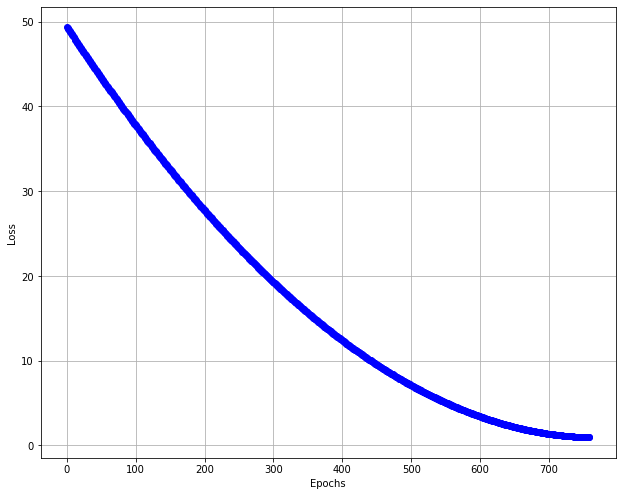

In [70]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss, marker = 'o', color='b');

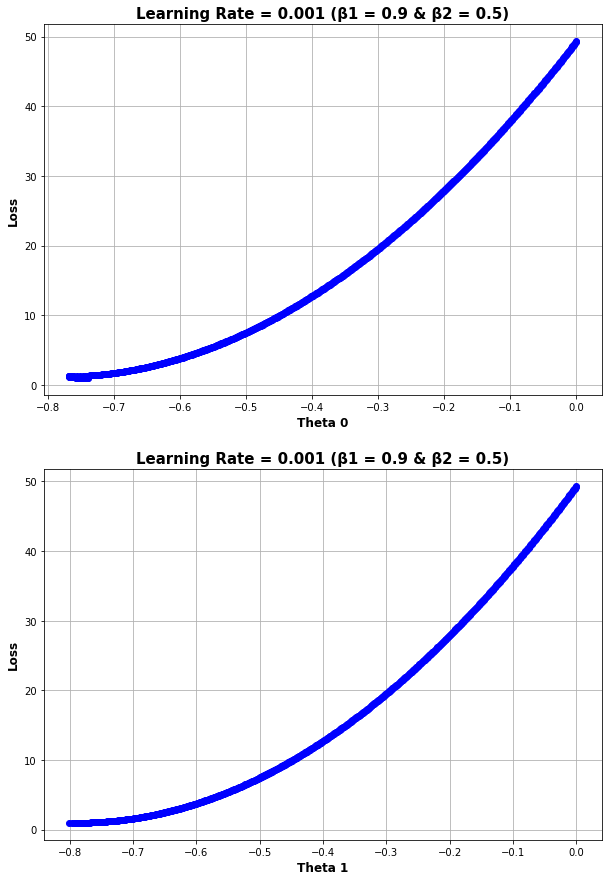

In [71]:
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))

ax1.set_title('Learning Rate = 0.001 (β1 = 0.9 & β2 = 0.5)', fontweight='bold', fontsize=15)
ax1.set_xlabel('Theta 0', fontweight='bold', fontsize=12)
ax1.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax1.grid()


ax1.plot(theta_0_upd, loss, marker = 'o', color='b')

ax2.set_title('Learning Rate = 0.001 (β1 = 0.9 & β2 = 0.5)', fontweight='bold', fontsize=15)
ax2.set_xlabel('Theta 1', fontweight='bold', fontsize=12)
ax2.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax2.grid()

ax2.plot(theta_1_upd, loss, marker = 'o', color='b');

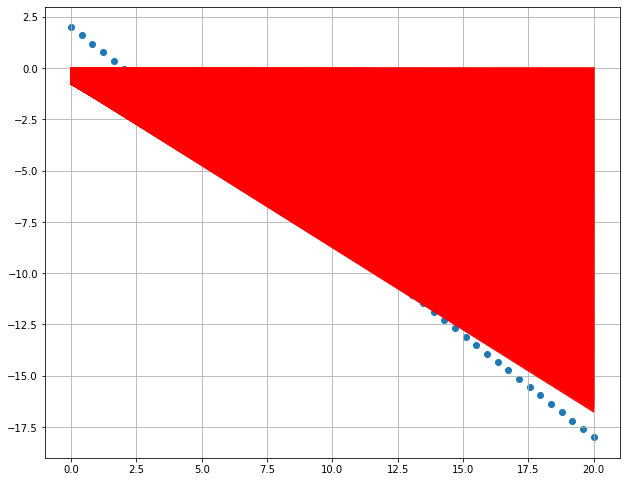

In [72]:
plt.scatter(X, y)
plt.grid()

for y_hat in preds:
  plt.plot(X, y_hat, color='r');

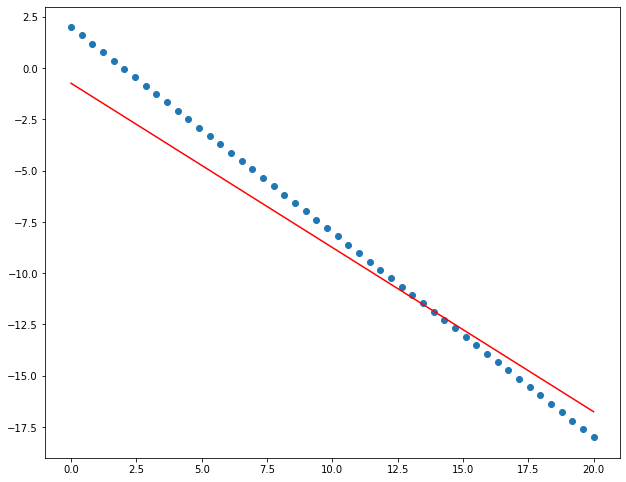

In [73]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='r');

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [74]:
theta_0_upd, theta_1_upd, loss, preds = adam(X, y, 0.001, 0.5, 0.99, 1e-08, 5000)

Streaming output truncated to the last 5000 lines.
  -2.20242769  -2.51218387  -2.82194006  -3.13169625  -3.44145243
  -3.75120862  -4.06096481  -4.37072099  -4.68047718  -4.99023337
  -5.29998955  -5.60974574  -5.91950193  -6.22925811  -6.5390143
  -6.84877049  -7.15852667  -7.46828286  -7.77803905  -8.08779523
  -8.39755142  -8.70730761  -9.01706379  -9.32681998  -9.63657617
  -9.94633235 -10.25608854 -10.56584473 -10.87560091 -11.1853571
 -11.49511329 -11.80486947 -12.11462566 -12.42438185 -12.73413803
 -13.04389422 -13.35365041 -13.66340659 -13.97316278 -14.28291897
 -14.59267515 -14.90243134 -15.21218753 -15.52194371 -15.8316999 ]

Error Vector: 
[-2.65364676 -2.55523968 -2.4568326  -2.35842552 -2.26001844 -2.16161136
 -2.06320428 -1.9647972  -1.86639013 -1.76798305 -1.66957597 -1.57116889
 -1.47276181 -1.37435473 -1.27594765 -1.17754057 -1.0791335  -0.98072642
 -0.88231934 -0.78391226 -0.68550518 -0.5870981  -0.48869102 -0.39028395
 -0.29187687 -0.19346979 -0.09506271  0.00334437

In [75]:
y_pred = theta_0_upd[-1] +  (X * theta_1_upd[-1])
r2_score(y, y_pred)

0.949344733641701

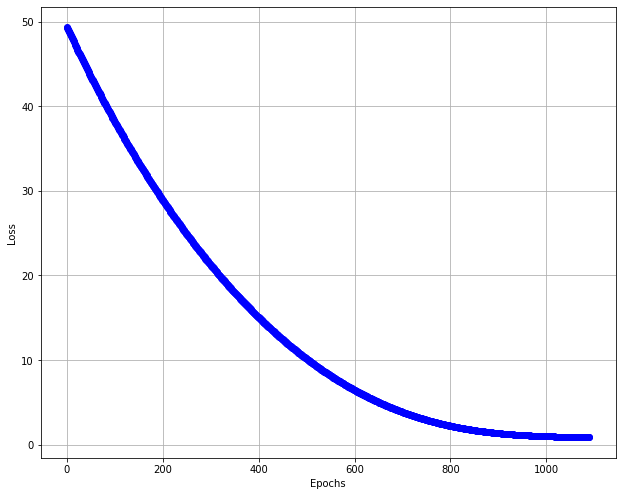

In [76]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss, marker = 'o', color='b');

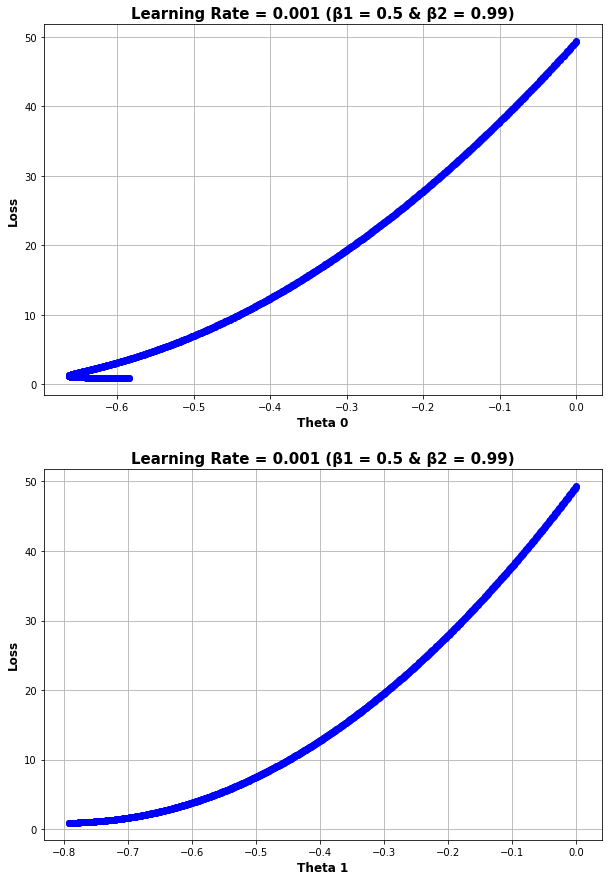

In [77]:
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))

ax1.set_title('Learning Rate = 0.001 (β1 = 0.5 & β2 = 0.99)', fontweight='bold', fontsize=15)
ax1.set_xlabel('Theta 0', fontweight='bold', fontsize=12)
ax1.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax1.grid()


ax1.plot(theta_0_upd, loss, marker = 'o', color='b')

ax2.set_title('Learning Rate = 0.001 (β1 = 0.5 & β2 = 0.99)', fontweight='bold', fontsize=15)
ax2.set_xlabel('Theta 1', fontweight='bold', fontsize=12)
ax2.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax2.grid()

ax2.plot(theta_1_upd, loss, marker = 'o', color='b');

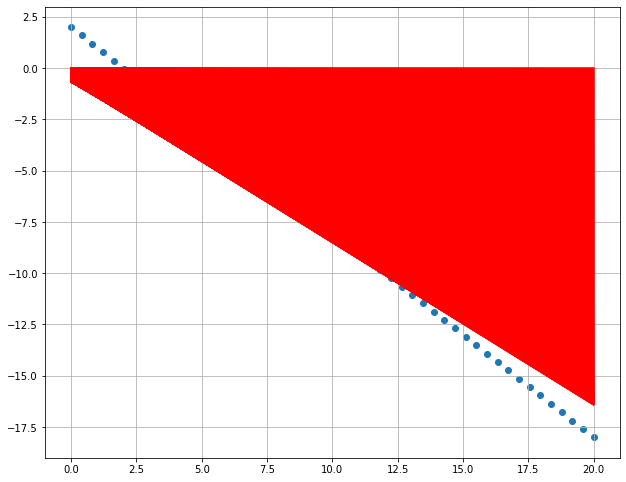

In [78]:
plt.scatter(X, y)
plt.grid()

for y_hat in preds:
  plt.plot(X, y_hat, color='r');

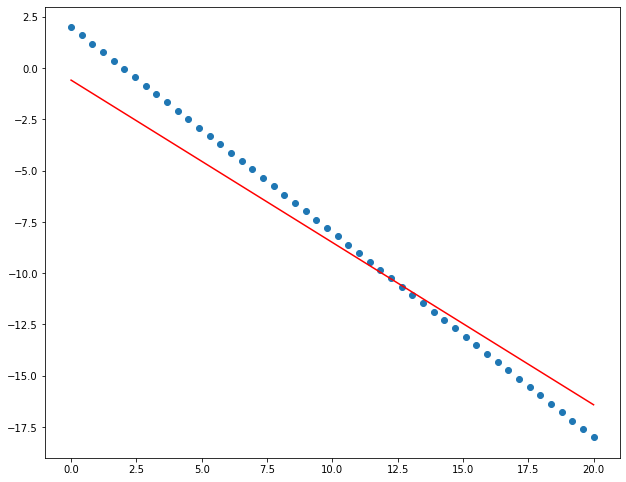

In [79]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='r');

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [80]:
theta_0_upd, theta_1_upd, loss, preds = adam(X, y, 0.001, 0.5, 0.5, 1e-08, 5000)

Streaming output truncated to the last 5000 lines.
  -2.11636085  -2.40043885  -2.68451684  -2.96859483  -3.25267282
  -3.53675082  -3.82082881  -4.1049068   -4.38898479  -4.67306279
  -4.95714078  -5.24121877  -5.52529676  -5.80937476  -6.09345275
  -6.37753074  -6.66160873  -6.94568673  -7.22976472  -7.51384271
  -7.7979207   -8.08199869  -8.36607669  -8.65015468  -8.93423267
  -9.21831066  -9.50238866  -9.78646665 -10.07054464 -10.35462263
 -10.63870063 -10.92277862 -11.20685661 -11.4909346  -11.7750126
 -12.05909059 -12.34316858 -12.62724657 -12.91132456 -13.19540256
 -13.47948055 -13.76355854 -14.04763653 -14.33171453 -14.61579252]

Error Vector: 
[-2.69597089 -2.57188562 -2.44780035 -2.32371507 -2.1996298  -2.07554453
 -1.95145926 -1.82737398 -1.70328871 -1.57920344 -1.45511816 -1.33103289
 -1.20694762 -1.08286234 -0.95877707 -0.8346918  -0.71060653 -0.58652125
 -0.46243598 -0.33835071 -0.21426543 -0.09018016  0.03390511  0.15799038
  0.28207566  0.40616093  0.5302462   0.6543314

In [81]:
y_pred = theta_0_upd[-1] +  (X * theta_1_upd[-1])
r2_score(y, y_pred)

0.9475845101116701

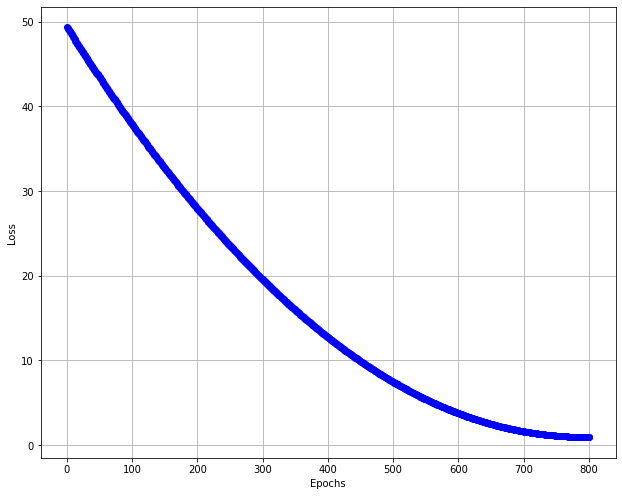

In [82]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss, marker = 'o', color='b');

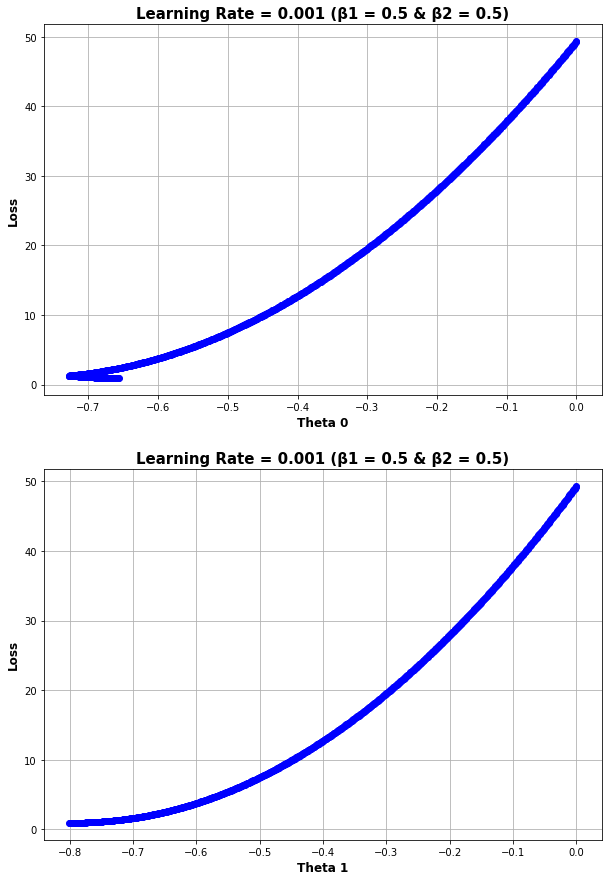

In [83]:
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))

ax1.set_title('Learning Rate = 0.001 (β1 = 0.5 & β2 = 0.5)', fontweight='bold', fontsize=15)
ax1.set_xlabel('Theta 0', fontweight='bold', fontsize=12)
ax1.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax1.grid()


ax1.plot(theta_0_upd, loss, marker = 'o', color='b')

ax2.set_title('Learning Rate = 0.001 (β1 = 0.5 & β2 = 0.5)', fontweight='bold', fontsize=15)
ax2.set_xlabel('Theta 1', fontweight='bold', fontsize=12)
ax2.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax2.grid()

ax2.plot(theta_1_upd, loss, marker = 'o', color='b');

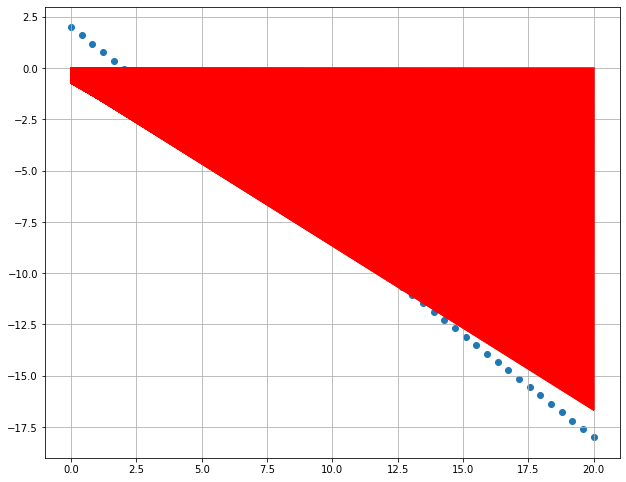

In [84]:
plt.scatter(X, y)
plt.grid()

for y_hat in preds:
  plt.plot(X, y_hat, color='r');

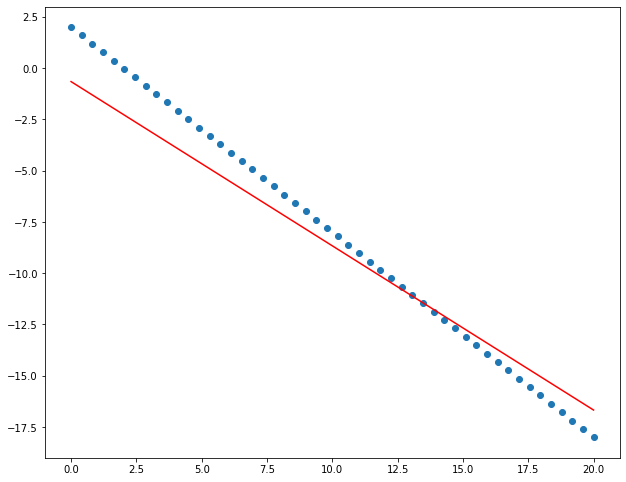

In [85]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='r');

##### The following results uses alpha = 0.01, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [86]:
theta_0_upd, theta_1_upd, loss, preds = adam(X, y, 0.01, 0.9, 0.99, 1e-08, 5000)

Streaming output truncated to the last 5000 lines.
  0.40010897  0.44147042  0.48283187  0.52419332  0.56555478  0.60691623
  0.64827768  0.68963913]

 j = 0.2305300668150129


Gradient Vector : [-0.32371645  0.27855897]

Gradient Vector Norm: 0.42706842471805795
m_0_0: -0.3349789969262851
m_1_0: 0.29203051566069854 

m_0_0_corr: -0.3349789969262851
m_1_0_corr: 0.29203051566069854 

v_0_0: 0.39573807773562863
v_1_0: 51.67234526807969 

v_0_0_corr: 0.39974398660239985
v_1_0_corr: 52.19540513449605

theta_0_new : 0.6682261532664733
theta_1_new : -0.8990686567925186


****************** Iteration 458 ********************


h(x):[  0.66822615   0.30125935  -0.06570744  -0.43267424  -0.79964104
  -1.16660784  -1.53357464  -1.90054144  -2.26750824  -2.63447503
  -3.00144183  -3.36840863  -3.73537543  -4.10234223  -4.46930903
  -4.83627583  -5.20324263  -5.57020942  -5.93717622  -6.30414302
  -6.67110982  -7.03807662  -7.40504342  -7.77201022  -8.13897702
  -8.50594381  -8.87291061  -9.239877

In [87]:
y_pred = theta_0_upd[-1] +  (X * theta_1_upd[-1])
r2_score(y, y_pred)

0.9952892444628807

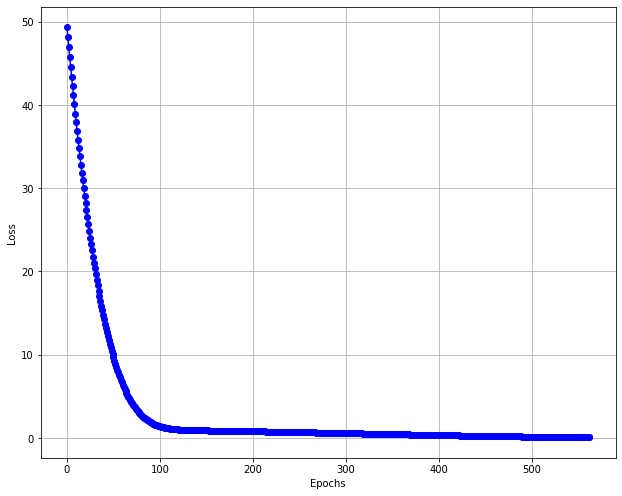

In [88]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss, marker = 'o', color='b');

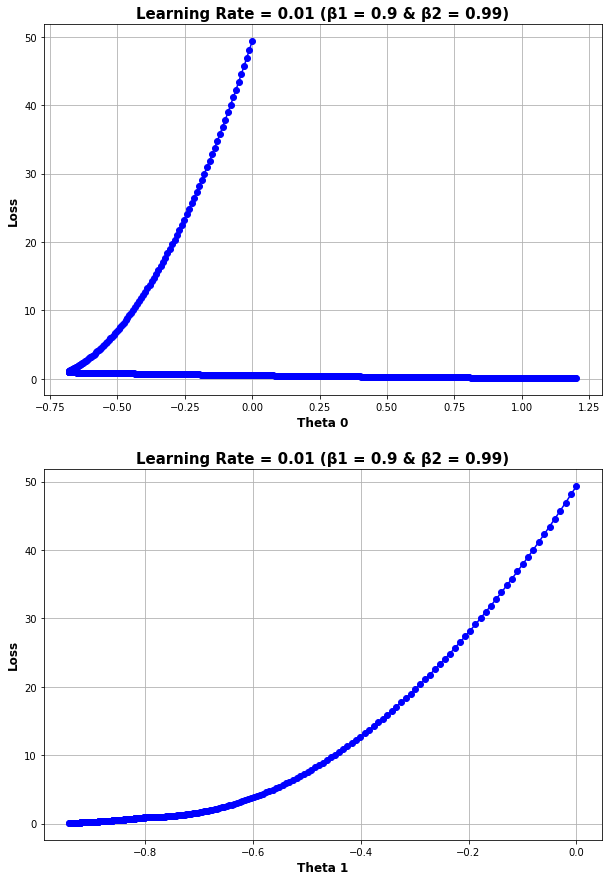

In [89]:
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))

ax1.set_title('Learning Rate = 0.01 (β1 = 0.9 & β2 = 0.99)', fontweight='bold', fontsize=15)
ax1.set_xlabel('Theta 0', fontweight='bold', fontsize=12)
ax1.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax1.grid()


ax1.plot(theta_0_upd, loss, marker = 'o', color='b')

ax2.set_title('Learning Rate = 0.01 (β1 = 0.9 & β2 = 0.99)', fontweight='bold', fontsize=15)
ax2.set_xlabel('Theta 1', fontweight='bold', fontsize=12)
ax2.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax2.grid()

ax2.plot(theta_1_upd, loss, marker = 'o', color='b');

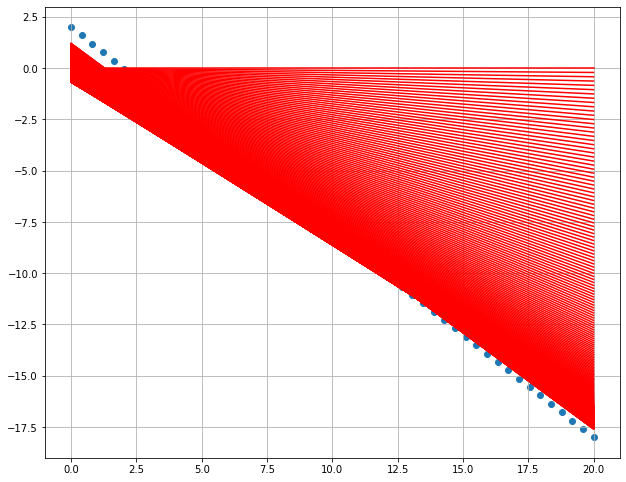

In [90]:
plt.scatter(X, y)
plt.grid()

for y_hat in preds:
  plt.plot(X, y_hat, color='r');

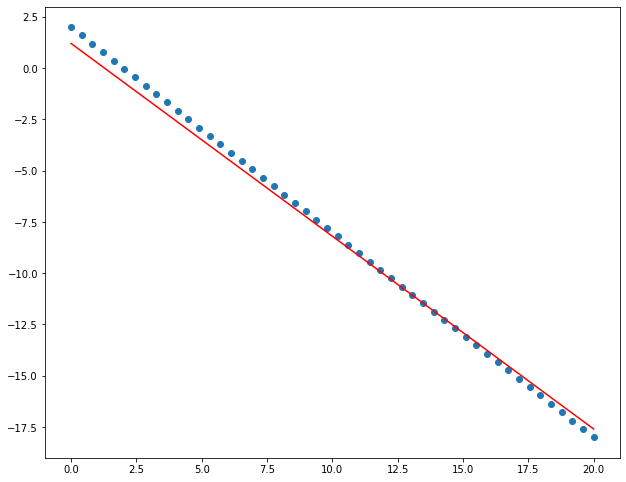

In [91]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='r');

## Congratulations 
![image.png](attachment:image.png)